THE SPARK FOUNDATION
GRIPJUNE2024
TASK:1
NAME:SHIVANI GIRI ||
FIELD: DATA SCIENCE AND BUSINESS ANALYTICS

# PREDICTION USING UNSUPERVISED ML

Unsupervised learning is a machine learning algorithm that searches for previously unknown patterns within unlabeled data sets. The most prominent methods of unsupervised learning are cluster analysis and principal component analysis.

In [1]:
#IMPORTING REQUIRED LIBRARIES IN THIS TASK
import pandas as pd
import numpy as np   
import seaborn as sns  
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
#Reading dataset
dfiris=pd.read_csv(r"C:\Users\91704\Desktop\Iris (1).csv")

We can also load iris dataset from sklearn
from sklearn import datasets
iris = datasets.load_iris()


In [3]:
#information regarding our data such as total columns, non null values
dfiris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# displaying top 10 values ,we can also see bottom values through tail() 
dfiris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
#For the further exploration dataset we do not require Id , will drop that colums
dfiris.drop(['Id'],axis=1,inplace=True)

In [6]:
dfiris.head(20)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [7]:
#Number of rows and coulmns in our dataset
dfiris.shape

(150, 5)

In [8]:
#checking is there any null values in there feature coulmns
dfiris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:

dfiris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
dfiris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Visualization of Dataset

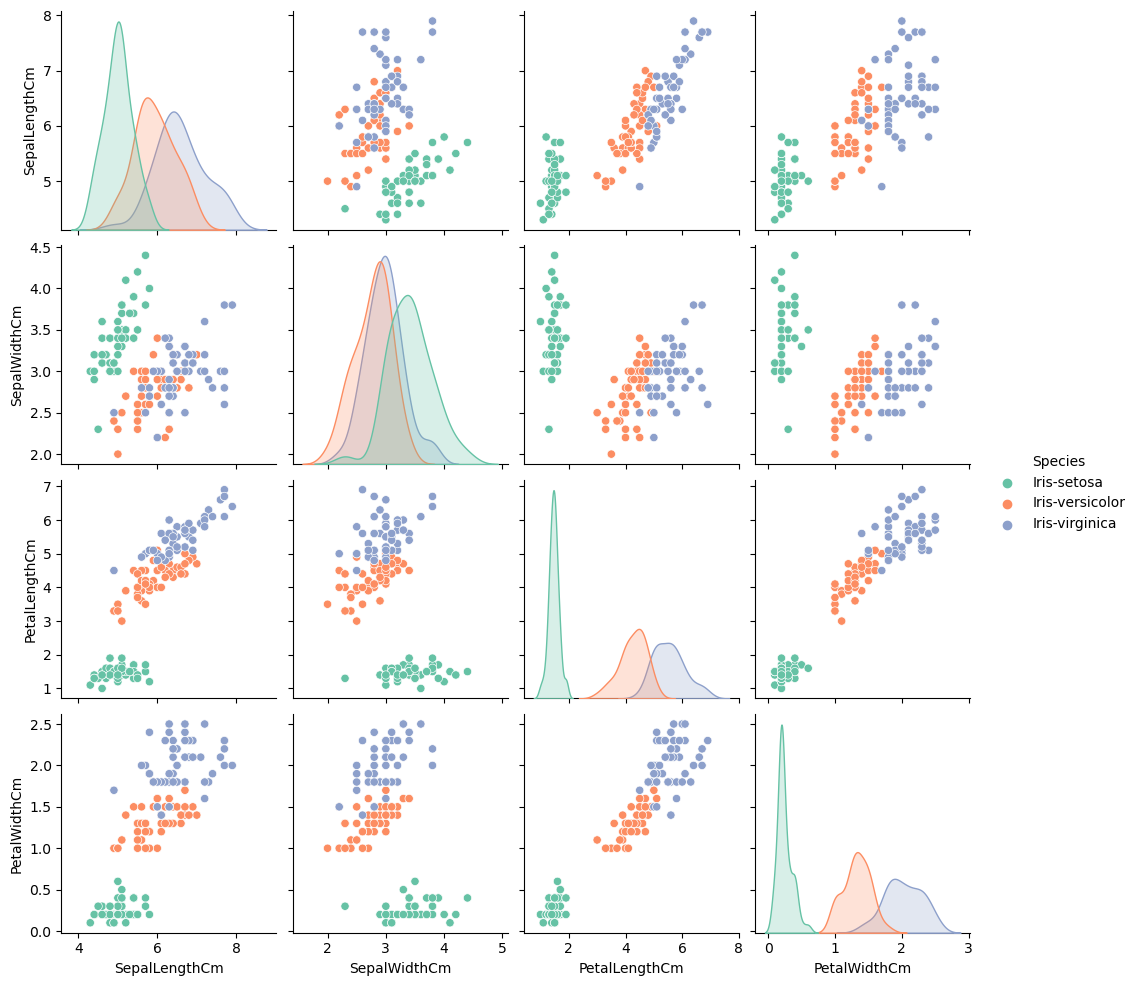

In [11]:
sns.pairplot(data=dfiris ,hue="Species",palette="Set2")
plt.show()

From the above graph we observe that many types of relationships from this plot such as the species Setosa has the smallest of petals widths and lengths. It also has the smallest sepal length but larger sepal widths. Such information can be gathered about any other species. We can observe that iris-setosa is easily separable from the other two species.

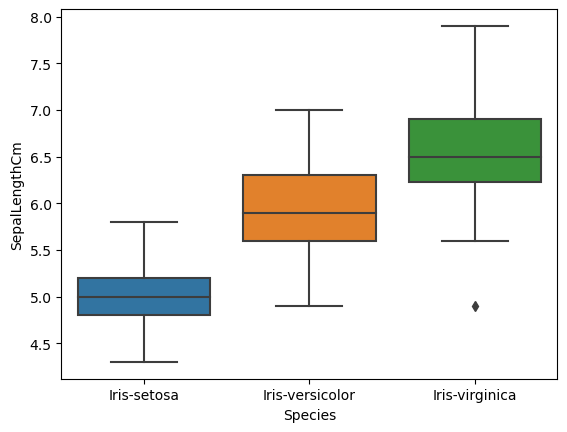

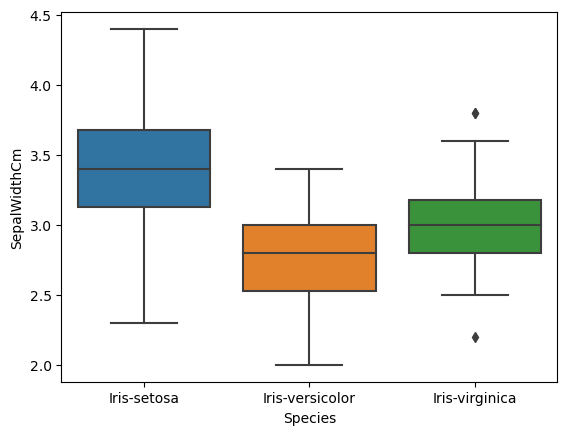

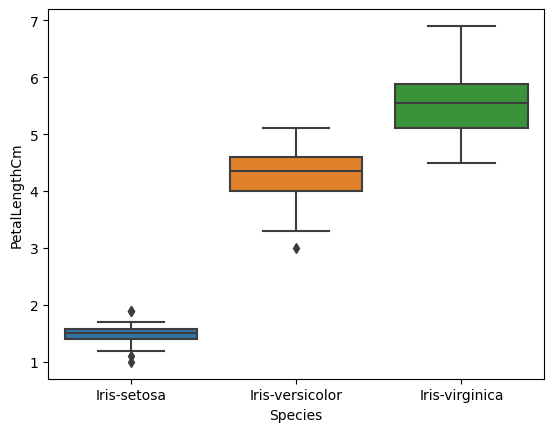

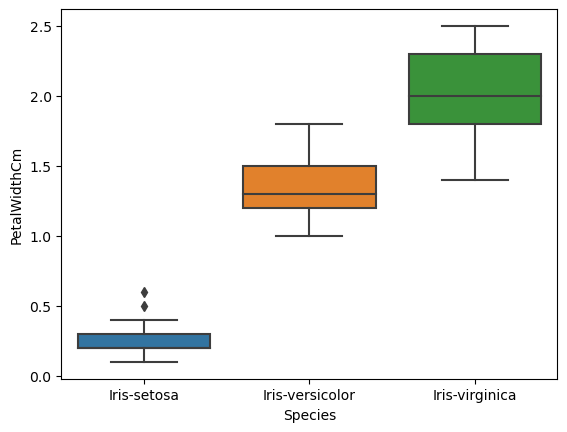

In [12]:
features = dfiris.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
for y in features:
    plt.subplot()
    sns.boxplot(x = "Species", y = y, data = dfiris)
    plt.show()


From the above graph, we can see that – 
Species Setosa has the smallest features and less distributed with some outliers.
Species Versicolor has the average features.
Species Virginica has the highest features.

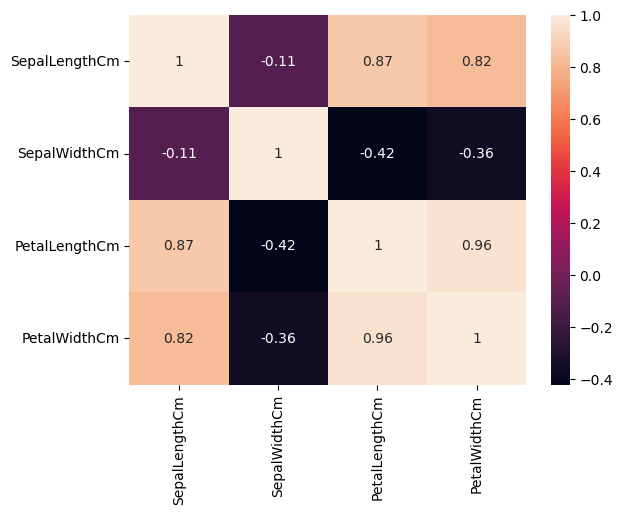

In [13]:
#Heatmap to shows a correlation between all numerical variables in the dataset
sns.heatmap(features.corr(method='pearson'),annot=True)
plt.show()

From the above graph, we can see that –
Petal width and petal length have high correlations. 
Petal length and sepal width have good correlations.
Petal Width and Sepal length have good correlations.

# Task:1 Predicting optimum number of clusters

The most common and simplest clustering algorithm out there is the K-Means clustering. This algorithms involve you telling the algorithms how many possible cluster (or K) there are in the dataset. The algorithm then iteratively moves the k-centers and selects the datapoints that are closest to that centroid in the cluster.

C:\Users\91704\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91704\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91704\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91704\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is k

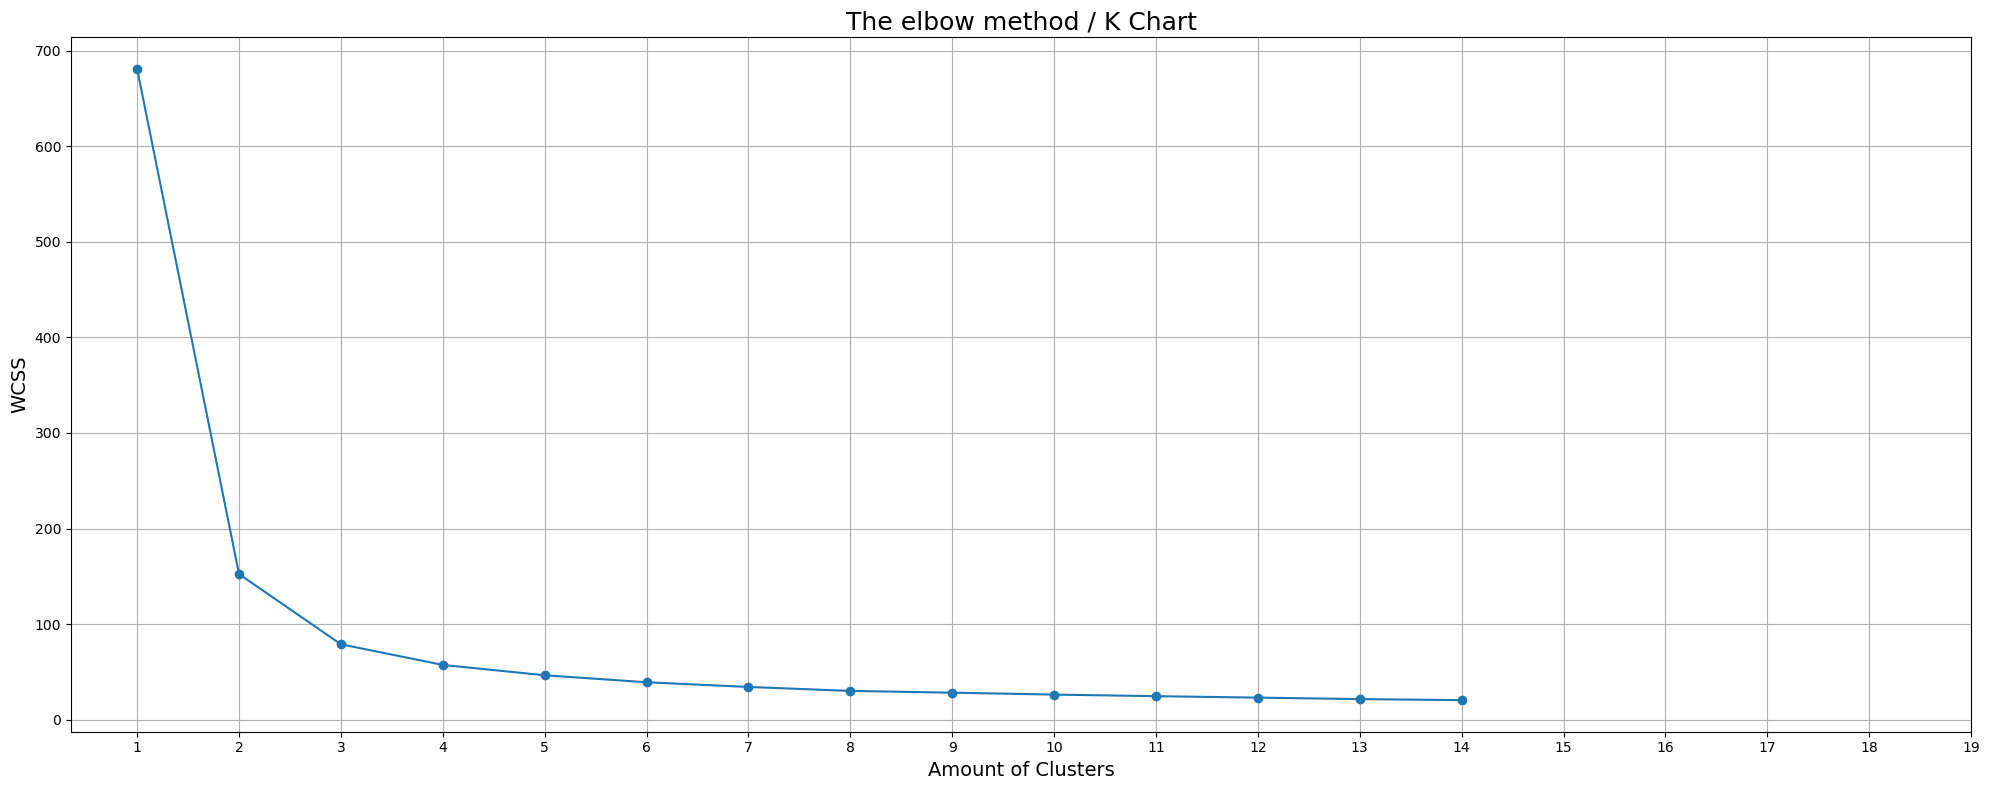

In [14]:
## Finding the optimum number of clusters for k-means classification

wcss = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,n_init = 5)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
# Plotting the results onto a line graph,   
plt.figure(figsize=(20,8))
plt.title("The elbow method / K Chart", fontsize=18)
plt.plot(range(1,15),wcss,"-o")
plt.grid(True)
plt.xlabel("Amount of Clusters",fontsize=14)
plt.ylabel("WCSS",fontsize=14)
plt.xticks(range(1,20))
plt.tight_layout()
plt.show()


help(kmeans)

The best number for K is the “elbow rule” , which is basically looking for a plot line that respectively has a slope nearest to 90 degrees compared to y axis and be smallest possible and from the above graph we observe that 2 or 3 seems to be our Best value(s) for clusters

For determining  K(numbers of clusters) we use Elbow method.  Elbow Method is a technique that we use to determine the number of centroids(k) to use in a k-means clustering algorithm.  In this method to determine the k-value we continuously iterate for k=1 to k=n (Here n is the hyperparameter that we choose as per our requirement). For every value of k, we calculate the within-cluster sum of squares (WCSS) value. WCSS - It is defined as the sum of square distances between the centroids and
each points.

C:\Users\91704\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91704\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91704\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91704\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You c

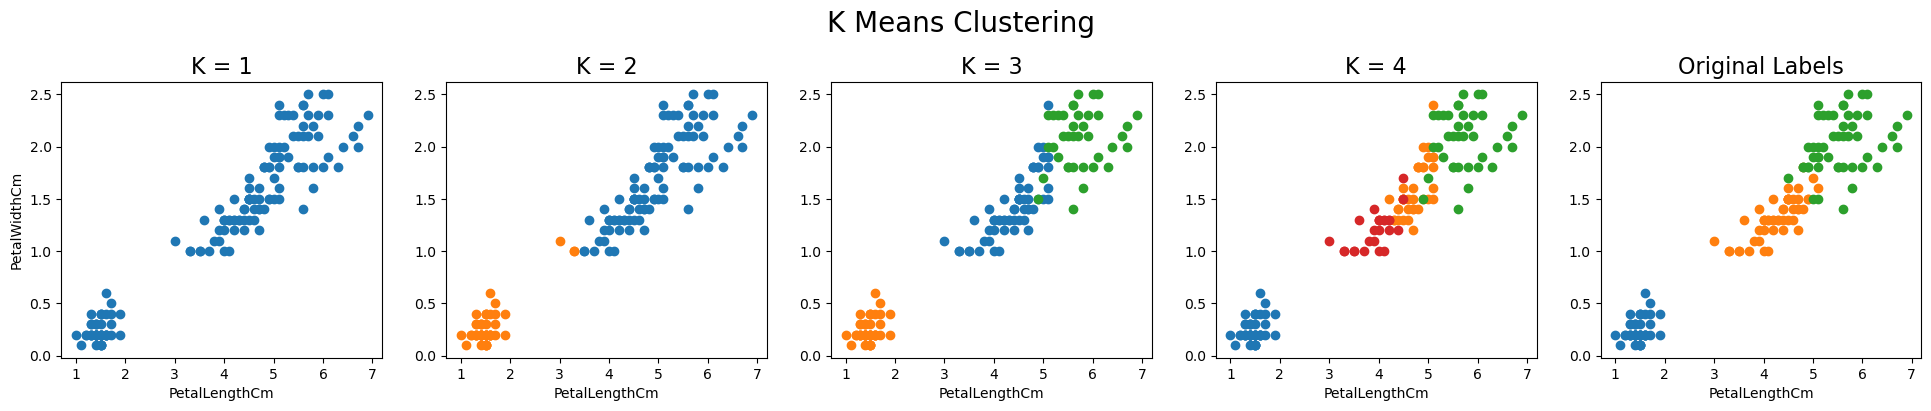

In [15]:
#visualizing different value of k 
plt.figure(figsize=(24,4))

plt.suptitle("K Means Clustering",fontsize=20)


plt.subplot(1,5,1)
plt.title("K = 1",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.scatter(features.PetalLengthCm,features.PetalWidthCm)


plt.subplot(1,5,2)
plt.title("K = 2",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=2)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])

plt.subplot(1,5,3)
plt.title("K = 3",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=3)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])

plt.subplot(1,5,4)
plt.title("K = 4",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=4)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])
plt.scatter(features.PetalLengthCm[features.labels == 3],features.PetalWidthCm[features.labels == 3])

plt.subplot(1,5,5)
plt.title("Original Labels",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.scatter(dfiris.PetalLengthCm[dfiris.Species == "Iris-setosa"],dfiris.PetalWidthCm[dfiris.Species == "Iris-setosa"])
plt.scatter(dfiris.PetalLengthCm[dfiris.Species == "Iris-versicolor"],dfiris.PetalWidthCm[dfiris.Species == "Iris-versicolor"])
plt.scatter(dfiris.PetalLengthCm[dfiris.Species == "Iris-virginica"],dfiris.PetalWidthCm[dfiris.Species == "Iris-virginica"])

plt.subplots_adjust(top=0.8)
plt.show()

Kmeans visibly did an amazing job with 3 clusters. Except few data points, we can say prediction is identical to the original with labels. Which shows that our ELBOW chart was right.

 # Applying kmeans to the dataset 

In [16]:
#dropping levels 
#features.drop(["labels"],axis=1,inplace=True)
df=dfiris.iloc[:,[0,1,2,3]].values

In [17]:
kmeans = KMeans(n_clusters=3)
kmeans_predict = kmeans.fit_predict(df)

C:\Users\91704\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91704\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


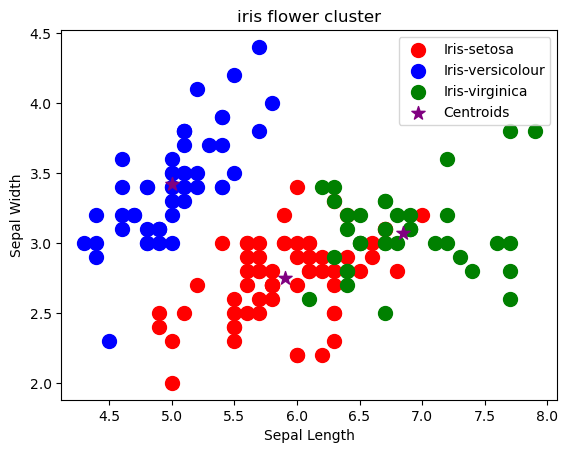

In [18]:

plt.scatter(df[kmeans_predict == 0, 0], df[kmeans_predict == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(df[kmeans_predict == 1, 0], df[kmeans_predict == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(df[kmeans_predict == 2, 0], df[kmeans_predict == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'purple', label = 'Centroids',marker="*")
plt.title('iris flower cluster')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

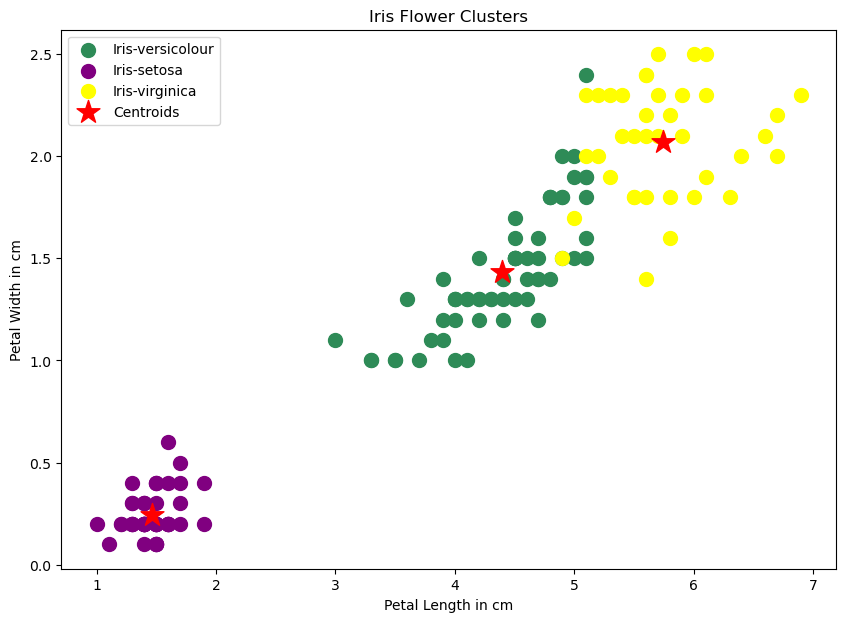

In [19]:
fig = plt.figure(figsize=(10, 7))
plt.title('Clusters with Centroids',fontweight ='bold', fontsize=20)
plt.scatter(df[kmeans_predict == 0, 2], df[kmeans_predict == 0, 3], s = 100, c = 'seagreen', label = 'Iris-versicolour')
plt.scatter(df[kmeans_predict == 1, 2], df[kmeans_predict == 1, 3], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(df[kmeans_predict == 2, 2], df[kmeans_predict == 2, 3],s = 100, c = 'yellow', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 300, c = 'red',marker='*', 
            label = 'Centroids')
plt.title('Iris Flower Clusters')
plt.ylabel('Petal Width in cm')
plt.xlabel('Petal Length in cm')
plt.legend()